In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
x_file_path = 'dataset/linearX.csv'
y_file_path = 'dataset/linearY.csv'
linearX = pd.read_csv(x_file_path, header=None).values.flatten()
linearY = pd.read_csv(y_file_path, header=None).values.flatten()

# Normalize X
X_normalized = (linearX - np.mean(linearX)) / np.std(linearX)

# Gradient Descent Implementation
def gradient_descent(X, Y, lr=0.5, max_iters=1000, tolerance=1e-6):
    m = len(Y)
    theta_0, theta_1 = 0, 0
    cost_history = []

    for i in range(max_iters):
        predictions = theta_0 + theta_1 * X
        errors = predictions - Y

        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        gradient_0 = (1 / m) * np.sum(errors)
        gradient_1 = (1 / m) * np.sum(errors * X)

        theta_0 -= lr * gradient_0
        theta_1 -= lr * gradient_1

        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
            break

    return theta_0, theta_1, cost_history

In [2]:
theta_0, theta_1, cost_history = gradient_descent(X_normalized, linearY, lr=0.5)
print(f"Theta 0: {theta_0}, Theta 1: {theta_1}")
print(f"Final Cost: {cost_history[-1]}")

Theta 0: 0.9963767845458984, Theta 1: 0.0013398688222173952
Final Cost: 1.313194845507832e-06


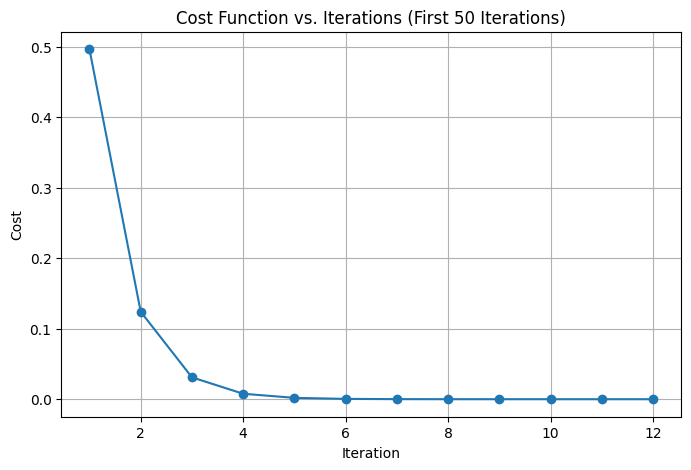

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, min(51, len(cost_history)) + 1), cost_history[:50], marker='o')
plt.title("Cost Function vs. Iterations (First 50 Iterations)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid()
plt.show()

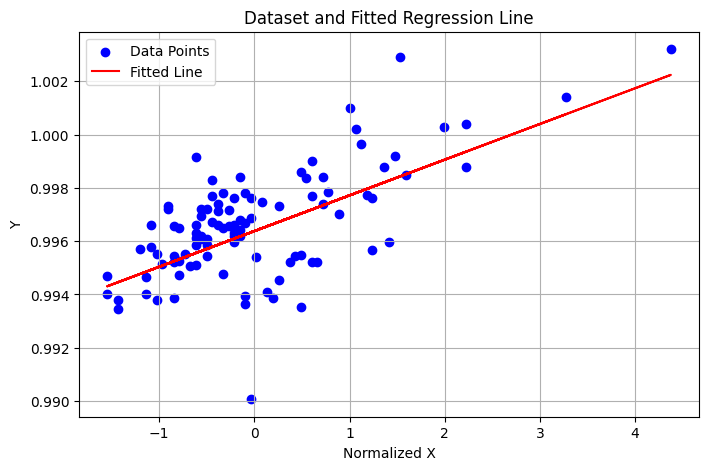

In [4]:
regression_line = theta_0 + theta_1 * X_normalized
plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, linearY, color='blue', label='Data Points')
plt.plot(X_normalized, regression_line, color='red', label='Fitted Line')
plt.title("Dataset and Fitted Regression Line")
plt.xlabel("Normalized X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

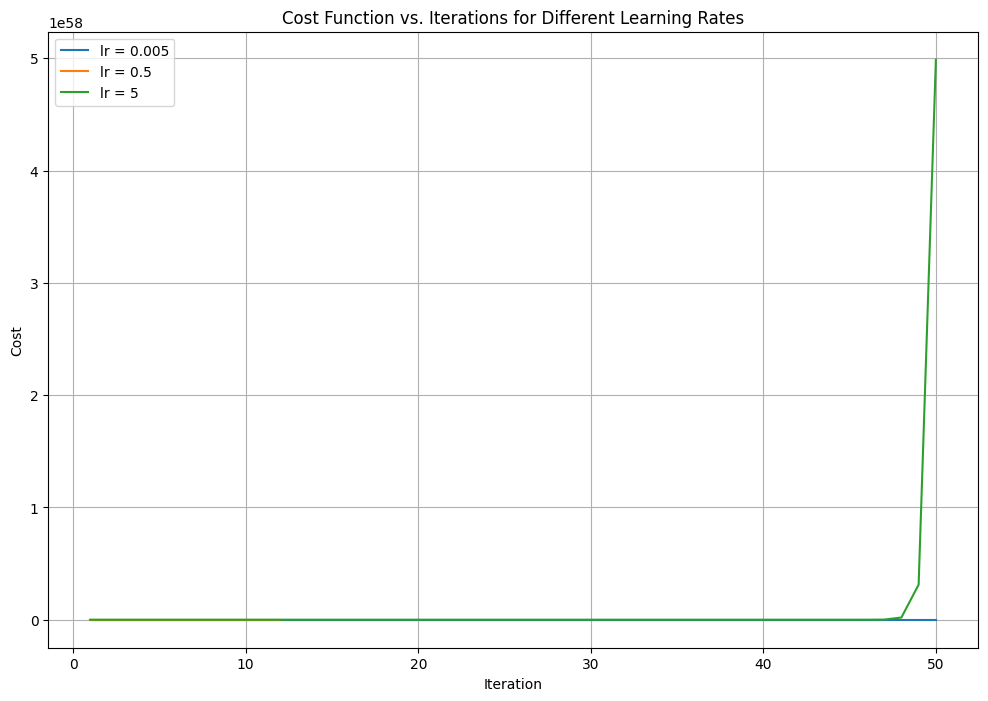

In [5]:
learning_rates = [0.005, 0.5, 5]
cost_histories = {}
for lr in learning_rates:
    _, _, cost_history_lr = gradient_descent(X_normalized, linearY, lr=lr, max_iters=50)
    cost_histories[lr] = cost_history_lr

plt.figure(figsize=(12, 8))
for lr, cost_history_lr in cost_histories.items():
    plt.plot(range(1, len(cost_history_lr) + 1), cost_history_lr, label=f'lr = {lr}')
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()

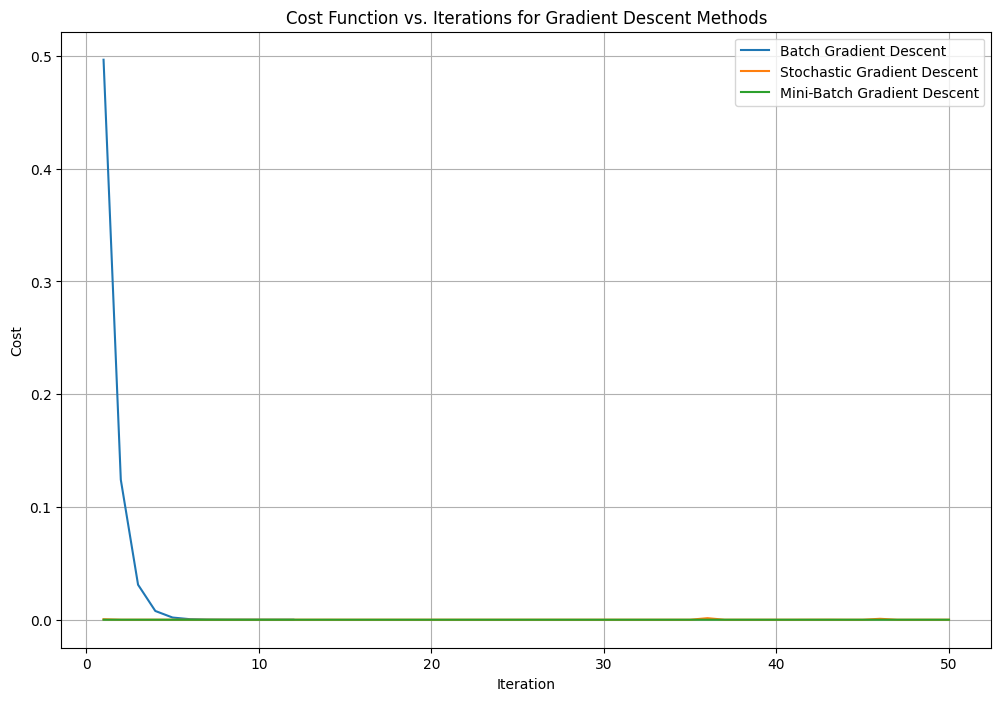

In [6]:
def stochastic_gradient_descent(X, Y, lr=0.5, max_iters=50):
    m = len(Y)
    theta_0, theta_1 = 0, 0
    cost_history = []

    for i in range(max_iters):
        for j in range(m):
            idx = np.random.randint(0, m)
            x_j, y_j = X[idx], Y[idx]

            prediction = theta_0 + theta_1 * x_j
            error = prediction - y_j
            gradient_0 = error
            gradient_1 = error * x_j

            theta_0 -= lr * gradient_0
            theta_1 -= lr * gradient_1

        predictions = theta_0 + theta_1 * X
        cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
        cost_history.append(cost)

    return theta_0, theta_1, cost_history

def mini_batch_gradient_descent(X, Y, lr=0.5, max_iters=50, batch_size=10):
    m = len(Y)
    theta_0, theta_1 = 0, 0
    cost_history = []

    for i in range(max_iters):
        indices = np.random.permutation(m)
        X_shuffled, Y_shuffled = X[indices], Y[indices]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size]
            Y_batch = Y_shuffled[j:j + batch_size]

            predictions = theta_0 + theta_1 * X_batch
            errors = predictions - Y_batch
            gradient_0 = (1 / len(X_batch)) * np.sum(errors)
            gradient_1 = (1 / len(X_batch)) * np.sum(errors * X_batch)

            theta_0 -= lr * gradient_0
            theta_1 -= lr * gradient_1

        predictions = theta_0 + theta_1 * X
        cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
        cost_history.append(cost)

    return theta_0, theta_1, cost_history

_, _, sgd_cost_history = stochastic_gradient_descent(X_normalized, linearY, lr=0.5)
_, _, mbgd_cost_history = mini_batch_gradient_descent(X_normalized, linearY, lr=0.5)

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cost_history[:50]) + 1), cost_history[:50], label='Batch Gradient Descent')
plt.plot(range(1, len(sgd_cost_history) + 1), sgd_cost_history, label='Stochastic Gradient Descent')
plt.plot(range(1, len(mbgd_cost_history) + 1), mbgd_cost_history, label='Mini-Batch Gradient Descent')
plt.title("Cost Function vs. Iterations for Gradient Descent Methods")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()
